In [1]:
import pandas as pd

In [3]:
iris = pd.read_csv('IRIS.csv')

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.shape

(150, 5)

In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34      True
35     False
36     False
37      True
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [11]:
iris.duplicated().drop_duplicates()

0     False
34     True
dtype: bool

In [14]:
iris = iris.drop_duplicates()


In [18]:
iris.shape

(147, 5)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

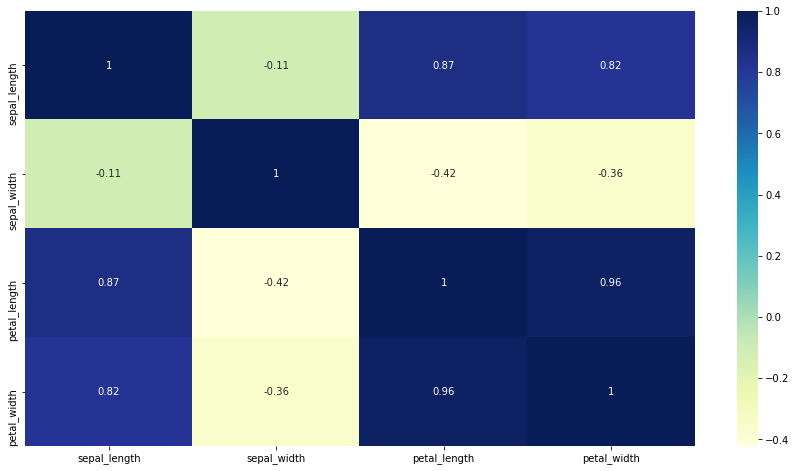

In [22]:
from sklearn.model_selection import train_test_split
X = iris.drop(['species'], axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [23]:
train_data = X_train.join(y_train)

In [27]:
train_data.shape

(117, 5)

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
forest.score(X_test,y_test)

0.9666666666666667

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', 0.5]
}

grid_search = GridSearchCV(estimator=forest, param_grid= param_grid, cv=5)

In [36]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [37]:
best_params

{'max_features': 'sqrt', 'n_estimators': 50}

In [38]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)


In [39]:
test_score

0.9333333333333333

In [41]:
X_new = [[5.1, 3.5, 1.4, 0.2]]

predictions = forest.predict(X_new)
predictions

array(['Iris-setosa'], dtype=object)